In [9]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
plot.prepare_for_plots()

<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Zero:  distilling from full-training teacher

In [14]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)
    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'zero')
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/zero_full_{i}.pt')

Batch #:   0%|          | 0/235 [00:00<?, ?it/s]

Model 2
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.4%, Validation loss: 0.598928 

Epoch 2
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.4%, Validation loss: 0.597962 

Epoch 3
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.4%, Validation loss: 0.597040 

Epoch 4
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.5%, Validation loss: 0.596191 

Epoch 5
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.5%, Validation loss: 0.595478 

Epoch 6
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.5%, Validation loss: 0.594738 

Epoch 7
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.5%, Validation loss: 0.594005 

Epoch 8
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 77.6%, Validation loss: 0.593187 

Epoch 9
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.7%, Validation loss: 0.388600 

Epoch 10
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.9%, Validation loss: 0.377986 

Epoch 11
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.9%, Validation loss: 0.375013 

Epoch 12
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.9%, Validation loss: 0.373276 

Epoch 13
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.0%, Validation loss: 0.371806 

Epoch 14
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.9%, Validation loss: 0.370477 

Epoch 15
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.0%, Validation loss: 0.369397 

Epoch 16
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.0%, Validation loss: 0.368218 

Epoch 17
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.0%, Validation loss: 0.367340 

Epoch 18
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.1%, Validation loss: 0.366259 

Epoch 19
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.1%, Validation loss: 0.365275 

Epoch 20
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.1%, Validation loss: 0.364419 

Epoch 21
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.1%, Validation loss: 0.363483 

Epoch 22
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.362735 

Epoch 23
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.361877 

Epoch 24
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.361181 

Epoch 25
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.360439 

Epoch 26
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.3%, Validation loss: 0.359678 

Epoch 27
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.359033 

Epoch 28
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.2%, Validation loss: 0.358389 

Epoch 29
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.3%, Validation loss: 0.357785 

Epoch 30
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.4%, Validation loss: 0.357050 

Epoch 31
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.3%, Validation loss: 0.356536 

Epoch 32
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.4%, Validation loss: 0.355990 

Epoch 33
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.4%, Validation loss: 0.355480 

Epoch 34
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.4%, Validation loss: 0.355027 

Epoch 35
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.3%, Validation loss: 0.354508 

Epoch 36
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.353927 

Epoch 37
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.353458 

Epoch 38
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.353087 

Epoch 39
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.352694 

Epoch 40
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.352266 

Epoch 41
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.351829 

Epoch 42
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.5%, Validation loss: 0.351407 

Epoch 43
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.351033 

Epoch 44
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.350665 

Epoch 45
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.350319 

Epoch 46
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.349858 

Epoch 47
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.349594 

Epoch 48
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.6%, Validation loss: 0.349164 

Epoch 49
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 87.7%, Validation loss: 0.348923 

Epoch 50
-------------------------------


Batch #:   0%|          | 0/40 [00:00<?, ?it/s]           

Validation accuracy: 87.7%, Validation loss: 0.348740 



Batch #:   0%|          | 0/40 [00:00<?, ?it/s]         

FSGM Accuracy [0.877, 0.8395, 0.799, 0.7514, 0.7005, 0.6436, 0.5872, 0.5351, 0.4816, 0.4305]


Noise Accuracy [0.877, 0.8616, 0.8192, 0.7606, 0.68, 0.6102, 0.5404, 0.4824, 0.4459, 0.3855]


50 50


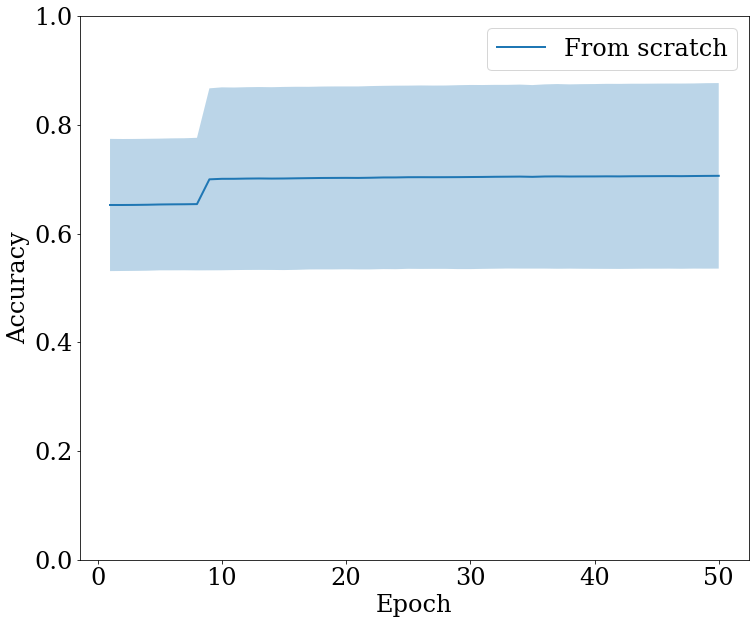

In [15]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

10 10


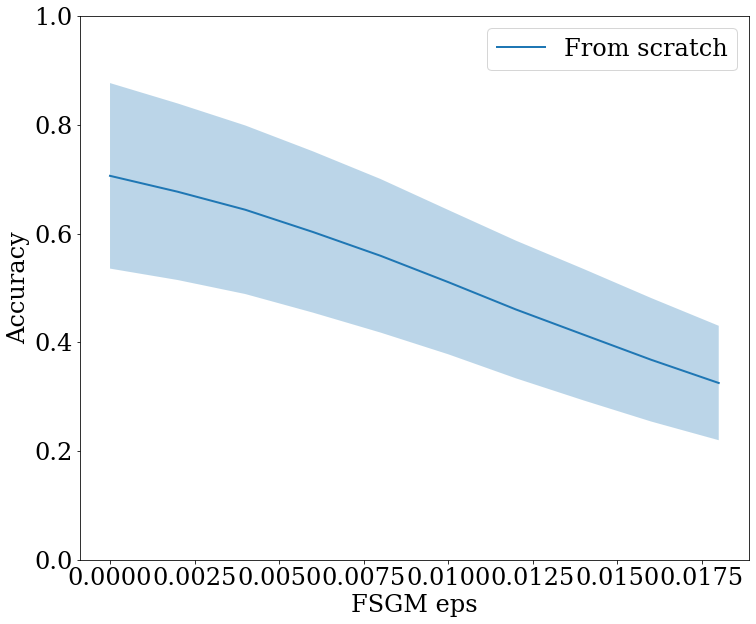

In [16]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

10 10


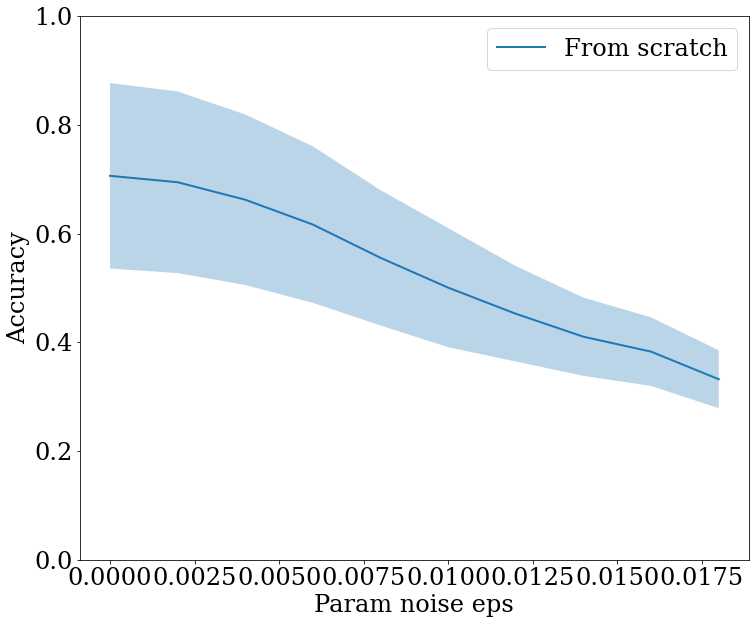

In [17]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [18]:
with open(pipeline.get_path()+'/history_full_zero.json', 'w') as out:
    out.write(json.dumps(history))

# Zero: distilling from 5-classes trainer

In [19]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'zero')
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/zero_5_{i}.pt')

Batch #:   0%|          | 0/235 [00:00<?, ?it/s]

Model 2
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 60.1%, Validation loss: 1.233032 

Epoch 2
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 75.1%, Validation loss: 0.779076 

Epoch 3
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 78.8%, Validation loss: 0.615618 

Epoch 4
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 81.0%, Validation loss: 0.551527 

Epoch 5
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 82.2%, Validation loss: 0.515158 

Epoch 6
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 83.0%, Validation loss: 0.490532 

Epoch 7
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 83.4%, Validation loss: 0.473705 

Epoch 8
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 83.8%, Validation loss: 0.460382 

Epoch 9
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 84.1%, Validation loss: 0.449655 

Epoch 10
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 84.5%, Validation loss: 0.440644 

Epoch 11
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 84.8%, Validation loss: 0.432842 

Epoch 12
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 84.9%, Validation loss: 0.425823 

Epoch 13
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.0%, Validation loss: 0.419764 

Epoch 14
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.1%, Validation loss: 0.414375 

Epoch 15
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.3%, Validation loss: 0.409394 

Epoch 16
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.6%, Validation loss: 0.404878 

Epoch 17
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.7%, Validation loss: 0.401046 

Epoch 18
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 85.8%, Validation loss: 0.397429 

Epoch 19
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.0%, Validation loss: 0.394212 

Epoch 20
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.0%, Validation loss: 0.391301 

Epoch 21
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.1%, Validation loss: 0.388406 

Epoch 22
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.2%, Validation loss: 0.385569 

Epoch 23
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.3%, Validation loss: 0.383017 

Epoch 24
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.5%, Validation loss: 0.380596 

Epoch 25
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.5%, Validation loss: 0.378317 

Epoch 26
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.5%, Validation loss: 0.376347 

Epoch 27
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.5%, Validation loss: 0.374419 

Epoch 28
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.6%, Validation loss: 0.372614 

Epoch 29
-------------------------------


Batch #:   0%|          | 0/235 [00:00<?, ?it/s]          

Validation accuracy: 86.7%, Validation loss: 0.370839 

Epoch 30
-------------------------------


Batch #:   0%|          | 0/40 [00:00<?, ?it/s]           

Validation accuracy: 86.7%, Validation loss: 0.369141 



Batch #:   0%|          | 0/40 [00:00<?, ?it/s]         

FSGM Accuracy [0.8672, 0.8423, 0.8158, 0.782, 0.749, 0.711, 0.6714, 0.6298, 0.5891, 0.547]


Noise Accuracy [0.8672, 0.8479, 0.8043, 0.7395, 0.6917, 0.6062, 0.5454, 0.4724, 0.4253, 0.3856]


30 30


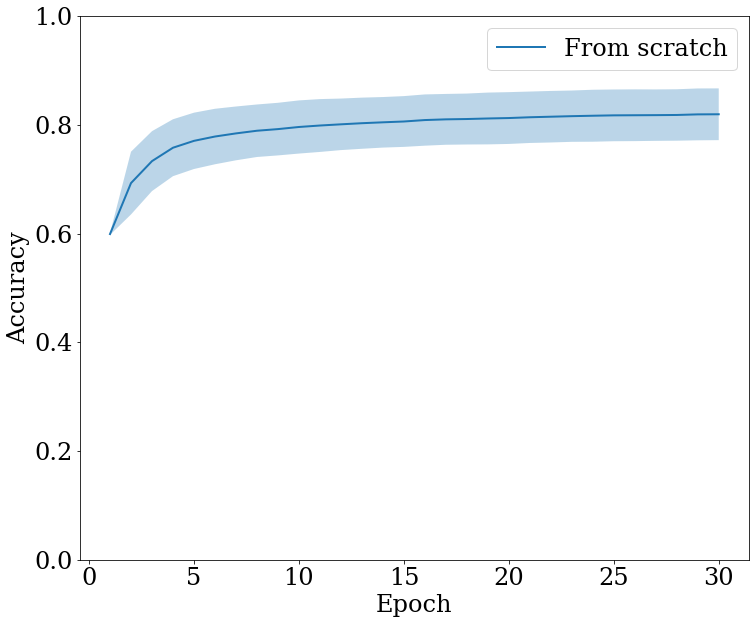

In [20]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

10 10


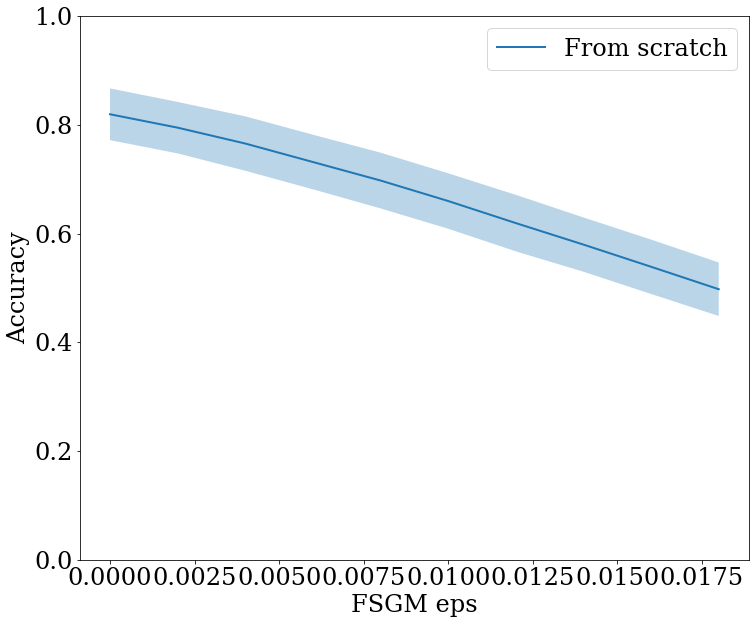

In [21]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

10 10


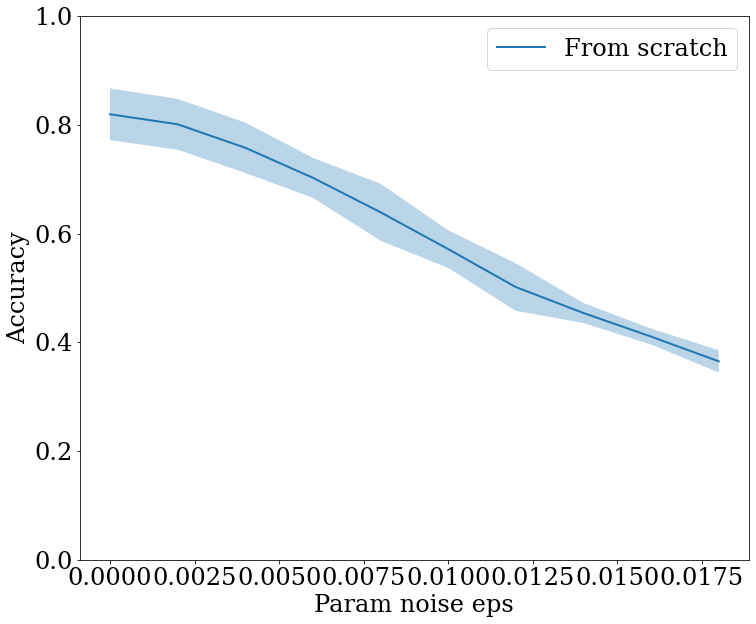

In [22]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [23]:
with open(pipeline.get_path()+'/history_5_zero.json', 'w') as out:
    out.write(json.dumps(history))